In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from daemon_analysis_tools.config import multiple_choice_scores, question_num_to_text
from daemon_analysis_tools.data_processing import load_and_process_data
from daemon_analysis_tools.file_handling import save_answers_to_yaml
from daemon_analysis_tools.scoring import calculate_scores, normalize_scores
from daemon_analysis_tools.visualization import plot_publisher_scores

Load and process data:
- Group answers by publisher and journal, trying to uniform names written in slightly different ways.
- Store in a DataFrame

In [4]:
data = load_and_process_data('../../data/raw/rdp.csv')

Save the answers to yaml files. Structure: files called like the journal inside folders called like the publisher, containing answers given by each encoder for each question.
TODO: I haven't checked why one AIP journal name is actually a link

In [19]:
save_answers_to_yaml(data, question_num_to_text, parent_folder='../../data/processed/all_answers')

Exception: [Errno 2] No such file or directory: '../../data/processed/all_answers/AIP/https://publishingaiporg/resources/researchers/open-science/research-data-policy/.yaml' for journal https://publishing.aip.org/resources/researchers/open-science/research-data-policy/
Exception: [Errno 2] No such file or directory: '../../data/processed/all_answers/Wiley/ce/papers.yaml' for journal Ce/Papers
Exception: [Errno 2] No such file or directory: '../../data/processed/all_answers/Wiley/ce/paper.yaml' for journal ce/paper


A sort of naive publisher scoring: assign the lowest score (e.g. `0`) to loose practices, and the largest score (e.g. `n-1`, if there are `n` possible answers) to the most stringent practices. No scoring to open-text questions yet. 
Scores are averaged among answers, until we agree on unique answers.

In [20]:
data_with_scores = calculate_scores(data, question_num_to_text, multiple_choice_scores)
normalized_data = normalize_scores(data_with_scores)

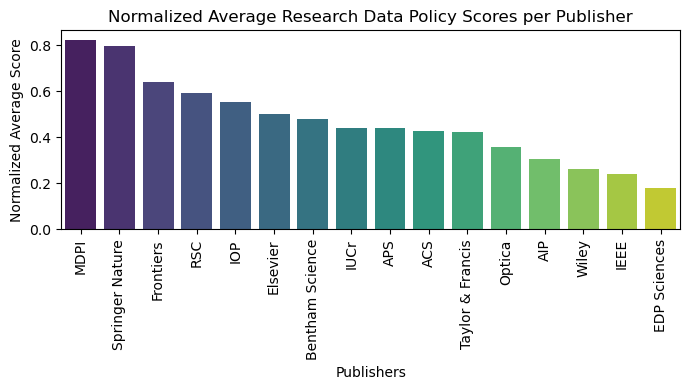

In [21]:
plot_publisher_scores(normalized_data)